# FUNCIONES DE AYUDA AL PROCESADO DE TEXTO

# MLearner

**MLearner** pretende ser una libreria de herramientas utiles para desarrollar algoritmos de Machine Learning e IA de manera mas facil e intuitiva. El desarrollo de esta libreria me ha servido para adquirir conocimientos de creacion de un proyecto de desarrollo software:

- Integracion Continua y Despliegue Continuo.

- Gestion de Repositorio a nivel de proyecto.

- Gestion de Repositorio OpenSource.

- Clean Code en desarrollo software.

- Frameworks Machine Learning y Deep Learning.

- Automatizacion de testing.

- Documentacion de codigo.

- Documentacion de la Libreria entorno Web.

- Empaquetacion y publicacion en Pypi.

![mlearner_web.png](images/mlearner_web.png)
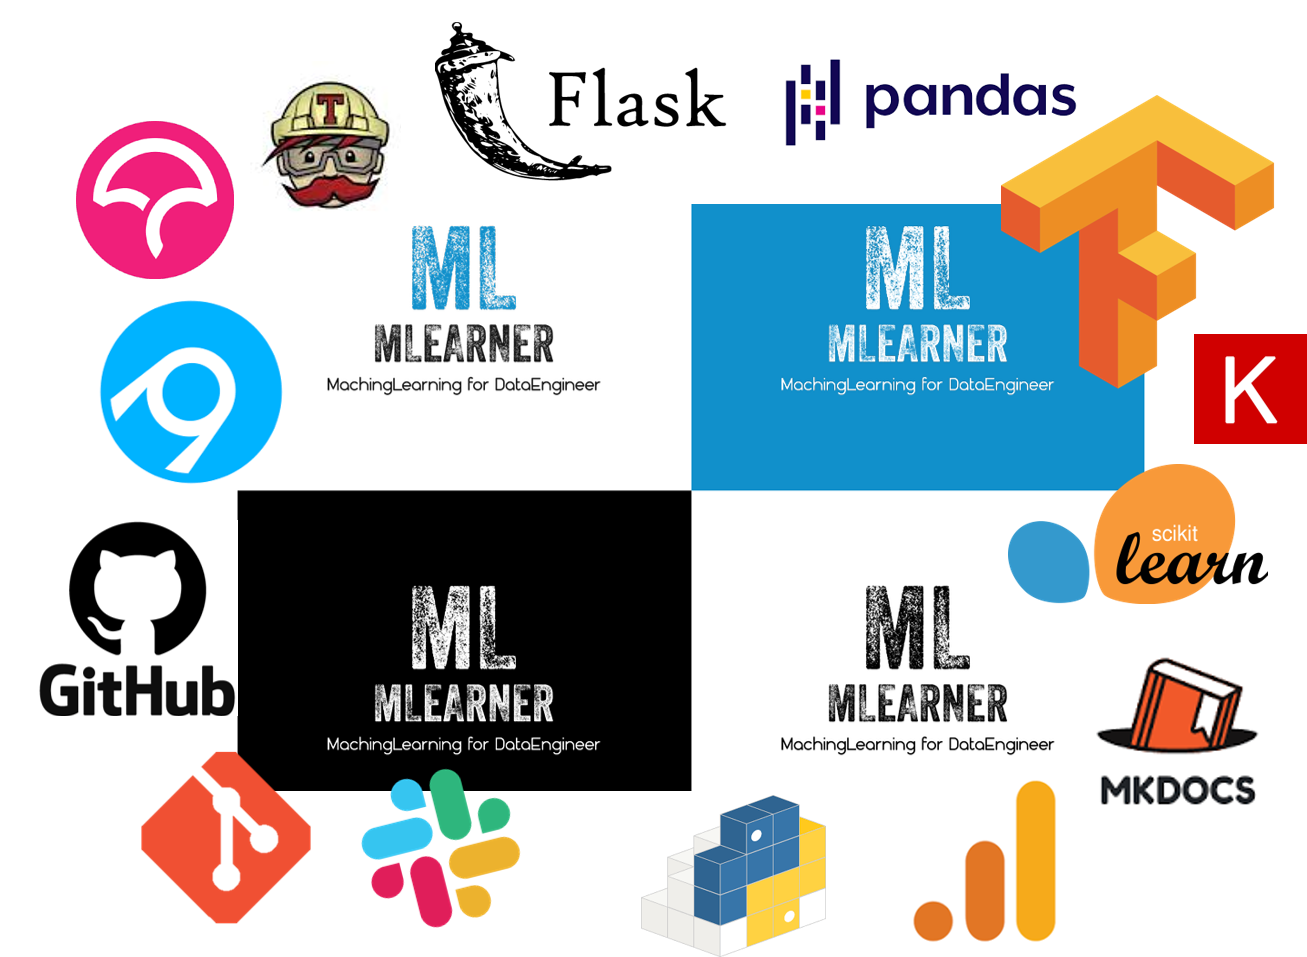

### PyPI
Para instalar **MLearner** ejecute:
```python
pip install mlearner
```

Como alternativa, puede descargar el paquete directamente desde PyPI https://pypi.python.org/pypi/mlearner, posteriormente desarchivelo y navegue hasta la ruta del paquete, una vez alli ejecute el siguiente comando:
```python
python setup.py install
```


### Links
- **Documentation:** https://jaisenbe58r.github.io/MLearner/
- **Source code repository:** https://github.com/jaisenbe58r/MLearner
- **PyPI:** https://pypi.python.org/pypi/mlearner


***

# Text Helper Functions

Implementation of functions for Natural language Processing

> from mlearner.nlp.helpers import *

## Overview
#### Helpers


List of implemented modules:

- URL
- Emoticons
- Email
- Hash
- Mention
- Number
- Phone Number
- Year
- Non Alphanumeric
- Punctuations
- Repetitive Character
- Dollar
- Number-Greater
- Number-Lesser
- Dates
- Only Words
- Only Numbers
- Boundaries
- Search
- Pick Sentence
- Duplicate Sentence
- Caps Words
- Length of Words
- Length of Characters
- Get ID
- Specific String Rows
- Hex code to Color
- Tags
- IP Address
- Mac Address
- Subword
- Latitude & Longitude
- PAN
- Phone Number Country Code
- Domain

## Importacion de Librerias

In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlearner import nlp 
from mlearner.preprocessing import DataAnalyst
from mlearner.utils import keras_checkpoint

import emoji

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carga del dataset

**SMS Spam Collection v.1**

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The Grumbletext Web site is: http://www.grumbletext.co.uk/

In [2]:
file = "data/SMSSpamCollection.txt"
file_csv = "data/SMSSpamCollection.csv"

if not os.path.isfile(file_csv):
    text = nlp.open_txt(file).replace("\t", "\n").split("\n")
    del text[-1] # Se borra la linea del final

    d = {'target': text[0::2], 'text': text[1::2]}
    sms = pd.DataFrame(d)
    sms.to_csv("data/SMSSpamCollection.csv", index=False)
else:
    sms = pd.read_csv(file_csv)

sms.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


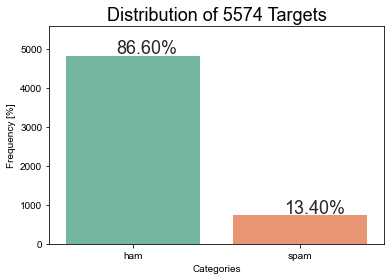

In [3]:
dataset = DataAnalyst.load_dataframe(sms)
dataset.distribution_targets(target=["target"])

***

## Procesado del Texto

In [4]:
data_clean = dataset.data.copy()

### URLs

* **find_url(text)**: Busqueda de URLs en el texto

In [5]:
from mlearner.nlp.helpers import find_url

In [6]:
data_clean['url'] = dataset.data['text'].apply(lambda x : find_url(x))
data_clean[data_clean["url"]!=""][["target", "url"]].head(5)

,target,url
15,spam,http://wap.
305,spam,http://img.
518,spam,http://www.bubbletext.com
635,spam,http://www.e-tlp.co.uk/expressoffer
833,spam,http://www.e-tlp.co.uk/expressoffer


***

### Emojis


* **find_emoji(text)**: Busqueda de emojis en el texto.

* **remove_emoji(text)**: Borra los _emoji_ del texto.

In [7]:
from mlearner.nlp.helpers import find_emoji, remove_emoji

In [8]:
sentence="I play () ... ()"
find_emoji(sentence)

['soccer_ball', 'beaming_face_with_smiling_eyes']

In [9]:
data_clean['emoji'] = dataset.data['text'].apply(lambda x : find_emoji(x))
data_clean['text'] = dataset.data['text'].apply(lambda x : remove_emoji(x))

***

### Email


* **find_email(text)**: Extraccion de emails del texto.


In [10]:
from mlearner.nlp.helpers import find_email

In [11]:
data_clean['emails'] = dataset.data['text'].apply(lambda x : find_email(x))
data_clean[data_clean["emails"]!=""][["target", "emails"]].head(5)

,target,emails
135,spam,31p.msg@150p
136,ham,yijue@hotmail.com
235,spam,recd@thirtyeight
474,spam,31p.msg@150p
541,spam,MonthlySubscription@50p


***

### Hash

* **find_hash(text)**: Busqueda de Hashtags en el texto


In [12]:
from mlearner.nlp.helpers import find_hash

In [13]:
data_clean['Hash'] = dataset.data['text'].apply(lambda x : find_hash(x))
data_clean[data_clean["Hash"]!=""][["target", "Hash"]].head(5)

,target,Hash
471,spam,5000
1781,spam,150
1985,spam,5000
3895,spam,5000


In [14]:
data_clean["text"].iloc[471]

'okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm'

***

### Mention

* **find_at(text)**: Busqueda de menciones "@" en el texto


In [15]:
from mlearner.nlp.helpers import find_at

In [16]:
data_clean['Mention'] = dataset.data['text'].apply(lambda x : find_at(x))
data_clean[data_clean["Mention"]!=""][["target", "Mention"]].tail(5)

,target,Mention
3299,spam,150p
3501,spam,kiefer
4906,spam,Warner kiosk kiosk
5104,spam,netvision
5344,spam,150p


***

### Numbers

* **find_number(text)**: Busqueda de numeros en el texto.


In [17]:
from mlearner.nlp.helpers import find_number

In [18]:
data_clean['Numbers'] = dataset.data['text'].apply(lambda x : find_number(x))
data_clean[data_clean["Numbers"]!=""][["target", "Numbers"]].head(5)

,target,Numbers
2,spam,2 21 2005 87121 08452810075 18
5,spam,3 1 50
7,ham,9
8,spam,900 09061701461 341 12
9,spam,11 08002986030


***

### Phone Number

* **find_phone_number(text)**: Busqueda de numeros de telefono españoles en el texto.


In [19]:
from mlearner.nlp.helpers import find_phone_number

In [20]:
data_clean['phone_number'] = dataset.data['text'].apply(lambda x : find_phone_number(x))

In [21]:
find_phone_number("+34666999666")

[('+34', '6', '6')]

***

### Find Year

* **find_year(text)**: Busqueda de años de nacimiento en el texto [1940-2040]


In [22]:
from mlearner.nlp.helpers import find_year

In [23]:
data_clean['Years'] = dataset.data['text'].apply(lambda x : find_year(x))
data_clean[data_clean["Years"]!=""][["target", "Years"]].head(5)

,target,Years
0,ham,[]
1,ham,[]
2,spam,[2005]
3,ham,[]
4,ham,[]


***

### Non Alphanumeric characters

* **find_nonalp(text)**: Extraccion de caracteres no alfanumericos.


In [24]:
from mlearner.nlp.helpers import find_nonalp

In [25]:
data_clean['nonalp'] = dataset.data['text'].apply(lambda x : find_nonalp(x))
data_clean[data_clean["nonalp"]!=""][["target", "nonalp"]].head(5)

,target,nonalp
0,ham,"[,, ., ., ., ., ., ., ., .]"
1,ham,"[., ., ., ., ., .]"
2,spam,"[., (, ), &, ', ']"
3,ham,"[., ., ., ., ., .]"
4,ham,"[', ,]"


***

### Retrieve punctuations from sentence

* **find_punct(text)**: Signos de puntuacion.


In [26]:
from mlearner.nlp.helpers import find_punct

In [27]:
data_clean['find_punct'] = dataset.data['text'].apply(lambda x : find_punct(x))
data_clean[data_clean["find_punct"]!=""][["target", "find_punct"]].head(5)

,target,find_punct
0,ham,"[,, ., ., ., ., ., ., ., .]"
1,ham,"[., ., ., ., ., .]"
2,spam,"[., (, ), &, ', ']"
3,ham,"[., ., ., ., ., .]"
4,ham,"[', ,]"


***

### Unique Char

* **unique_char(sentence)**: Elimina los caracteres repetidos de una palabra.


In [28]:
from mlearner.nlp.helpers import unique_char

In [29]:
sentence="I lovee Machinee learning!"
unique_char(sentence)

'I love Machine learning!'

***

### Prices

* **find_coin(text, symbol="$")**: Busqueda de precios en el texto


In [30]:
from mlearner.nlp.helpers import find_coin

In [31]:
data_clean['find_coin$'] = dataset.data['text'].apply(lambda x : find_coin(x, symbol="$"))
data_clean[data_clean["find_coin$"]!=""][["target", "find_coin$"]].head(2)

,target,find_coin$
60,ham,$1
123,spam,$350


In [32]:
dataset.data['text'].iloc[60]

"Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me."

***

### Numbers great

* **num_great(text)**: Busqueda de numeros mayores a 930.


In [33]:
from mlearner.nlp.helpers import num_great

In [34]:
data_clean['num_great'] = dataset.data['text'].apply(lambda x : num_great(x))
data_clean[data_clean["num_great"]!=""][["target", "num_great"]].head(5)

,target,num_great
2,spam,2005 87121 8452810075
8,spam,9061701461
9,spam,8002986030
11,spam,87575
12,spam,81010 4403


***

### Numbers less

* **num_less(text)**: Busqueda de numeros menores a 930.


In [35]:
from mlearner.nlp.helpers import num_less

In [36]:
data_clean['num_less'] = dataset.data['text'].apply(lambda x : num_less(x))
data_clean[data_clean["num_less"]!=""][["target", "num_less"]].tail(5)

,target,num_less
5557,ham,4 2 2 4
5564,ham,2
5565,ham,6
5568,spam,2
5569,spam,2 2


***

### Find Dates

* **find_dates(text)**: Busqueda de fechas [mm-dd-yyyy]


In [37]:
from mlearner.nlp.helpers import find_dates

In [38]:
sentence="Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020"
find_dates(sentence)

[('04', '28', '2020')]

In [39]:
data_clean['find_dates'] = dataset.data['text'].apply(lambda x : find_dates(x))

***

### Only Words

* **only_words(text)**: Eliminar los numeros del texto.


In [40]:
from mlearner.nlp.helpers import only_words

In [41]:
data_clean['only_words'] = dataset.data['text'].apply(lambda x : only_words(x))
data_clean[data_clean["only_words"]!=""][["target", "only_words"]].head(5)

,target,only_words
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in a wkly comp to win FA Cup final ...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don t think he goes to usf he lives arou...


***

### Search Key

* **search_string(text, key)**: Comprobar existencia de palabras en la frase.


In [42]:
from mlearner.nlp.helpers import search_string

In [43]:
data_clean['search_string'] = dataset.data['text'].apply(lambda x : search_string(x,' day '))
data_clean[data_clean["search_string"]==True][["target", "search_string"]].head(5)

,target,search_string
163,ham,True
252,ham,True
315,ham,True
359,ham,True
365,ham,True


In [44]:
data_clean["text"].iloc[163]

"I'm so in love with you. I'm excited each day i spend with you. You make me so happy."

***

### pick only key sentence

* **pick_only_key_sentence(text, keyword)**: Devuelve las frases que contiene la palabra (Keyword) seleccionada.


In [45]:
from mlearner.nlp.helpers import pick_only_key_sentence

In [46]:
data_clean['pick_only_key_sentence'] = dataset.data['text'].apply(lambda x : pick_only_key_sentence(x,' day '))
data_clean[data_clean["pick_only_key_sentence"]!=""][["target", "pick_only_key_sentence"]].iloc[163:165]

,target,pick_only_key_sentence
163,ham,[ I'm excited each day i spend with you]
164,spam,[]


***

### pick unique sentence

* **pick_unique_sentence(text)**: Elimina frases duplicadas

In [47]:
from mlearner.nlp.helpers import pick_unique_sentence

In [48]:
sentence="I thank doctors\nDoctors are working very hard in this pandemic situation\nI thank doctors"
pick_unique_sentence(sentence)

['Doctors are working very hard in this pandemic situation', 'I thank doctors']

In [49]:
data_clean['pick_unique_sentence'] = dataset.data['text'].apply(lambda x : pick_unique_sentence(x))

***

### Capital words

* **find_capital(text)**: Busqueda de palabras con primera letra en mayuscula.

In [50]:
from mlearner.nlp.helpers import find_capital

In [51]:
data_clean['find_capital'] = dataset.data['text'].apply(lambda x : find_capital(x))
data_clean[data_clean["find_capital"]!=""][["target", "find_capital"]].head(5)

,target,find_capital
0,ham,"[Go, Available, Cine]"
1,ham,"[Ok, Joking]"
2,spam,"[Free, FA, Cup, May, Text, FA]"
3,ham,[]
4,ham,[Nah]


***

### Remove tag html

* **remove_tag(text)**: Elimina los tags de html.

In [52]:
from mlearner.nlp.helpers import remove_tag

In [53]:
sentence="Markdown sentences can use <br> for breaks and <i></i> for italics"
remove_tag(sentence)

'Markdown sentences can use  for breaks and  for italics'

In [54]:
data_clean['remove_tag'] = dataset.data['text'].apply(lambda x : remove_tag(x))

***

### Mac address 

* **mac_add(text)**: Busqueda de _Mac address_ en el texto

In [55]:
from mlearner.nlp.helpers import mac_add

In [56]:
sentence="MAC ADDRESSES of this laptop - 00:24:17:b1:cc:cc. Other details will be mentioned"
mac_add(sentence)

['00:24:17:b1:cc:cc']

In [57]:
data_clean['mac_add'] = dataset.data['text'].apply(lambda x : mac_add(x))

***

### IP address 

* **ip_add(text)**: Busqueda de _IP address_ en el texto

In [58]:
from mlearner.nlp.helpers import ip_add

In [59]:
sentence="An example of ip address is 125.16.100.1"
ip_add(sentence)

['125.16.100.1']

In [60]:
data_clean['ip_add'] = dataset.data['text'].apply(lambda x : ip_add(x))

***

### Extract number of subwords

* **subword(string, sub)**: Devuelve el numero de veces que aparece la raiz de la palabra.

In [61]:
from mlearner.nlp.helpers import subword

In [62]:
sentence = 'Fundamentalism and constructivism are important skills'
subword(sentence,'ism') # change subword and try for others

2

In [63]:
data_clean['subword'] = dataset.data['text'].apply(lambda x : subword(x, "on"))
data_clean[["target", "text", "subword"]].head(5)

,target,text,subword
0,ham,"Go until jurong point, crazy.. Available only ...",2
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


***

### Valid latitude & longitude

* **lat_lon(string)**: Devuelve si el dato de Latitud y longitud es correcto.

In [64]:
from mlearner.nlp.helpers import lat_lon

In [65]:
lat_lon('28.6466772,76.8130649', display=True)
lat_lon('2324.3244,3423.432423', display=True)

[28.6466772,76.8130649] is valid latitude & longitude
[2324.3244,3423.432423] is not a valid latitude & longitude


False

In [66]:
data_clean['lat_lon'] = dataset.data['text'].apply(lambda x : lat_lon(x))
data_clean[["target", "text", "lat_lon"]].head(5)

,target,text,lat_lon
0,ham,"Go until jurong point, crazy.. Available only ...",False
1,ham,Ok lar... Joking wif u oni...,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False
3,ham,U dun say so early hor... U c already then say...,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False


***

### Valid latitude & longitude

* **find_domain(string)**: Devuelve si el dato de Latitud y longitud es correcto.

In [67]:
from mlearner.nlp.helpers import find_domain

In [68]:
data_clean['find_domain'] = dataset.data['text'].apply(lambda x : find_domain(x))
data_clean[["target", "text", "find_domain"]].iloc[10:15]

,target,text,find_domain
10,ham,I'm gonna be home soon and i don't want to tal...,[]
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",[]
12,spam,URGENT! You have won a 1 week FREE membership ...,[www.dbuk]
13,ham,I've been searching for the right words to tha...,[]
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,[]


In [69]:
data_clean["text"].iloc[12]

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

***

In [75]:
data_clean.T

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
target,ham,ham,spam,ham,ham,spam,ham,ham,spam,spam,...,ham,ham,ham,ham,spam,spam,ham,ham,ham,ham
text,"Go until jurong point, crazy.. Available only ...",Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup fina...,U dun say so early hor... U c already then say...,"Nah I don't think he goes to usf, he lives aro...",FreeMsg Hey there darling it's been 3 week's n...,Even my brother is not like to speak with me. ...,As per your request 'Melle Melle (Oru Minnamin...,WINNER!! As a valued network customer you have...,Had your mobile 11 months or more? U R entitle...,...,Ok lor... Sony ericsson salesman... I ask shuh...,Ard 6 like dat lor.,Why don't you wait 'til at least wednesday to ...,Huh y lei...,REMINDER FROM O2: To get 2.50 pounds free call...,This is the 2nd time we have tried 2 contact u...,Will ü b going to esplanade fr home?,"Pity, * was in mood for that. So...any other s...",The guy did some bitching but I acted like i'd...,Rofl. Its true to its name
url,,,,,,,,,,,...,,,,,,,,,,
emoji,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
emails,,,,,,,,,,,...,,,,,,,,,,
Hash,,,,,,,,,,,...,,,,,,,,,,
Mention,,,,,,,,,,,...,,,,,,,,,,
Numbers,,,2 21 2005 87121 08452810075 18,,,3 1 50,,9,900 09061701461 341 12,11 08002986030,...,2,6,,,2 2 50 2,2 2 750 2 087187272008 1 10,,,,
phone_number,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],"[(, 7, 0)]",[],[],[],[]
Years,[],[],[2005],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
